# Summary

Use [`python-fitbit`](http://python-fitbit.readthedocs.io/en/latest/#) to interact with the Fitbit API and download sleep data. Convert data to pandas dataframe and write to disk.

In [1]:
import fitbit
import os
import pandas as pd
from tqdm import tqdm
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('poster')

In [51]:
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
access_token = os.environ.get("ACCESS_TOKEN")
refresh_token = os.environ.get("REFRESH_TOKEN")
expires_at = float(os.environ.get("EXPIRES_AT"))

In [53]:
authd_client = fitbit.Fitbit(client_id, client_secret, access_token=access_token, 
                             refresh_token=refresh_token, expires_at=expires_at)

In [8]:
sleep_logs = []

rate_limit = 145

datetimes = pd.date_range('2016-11-09', '2017-07-31', freq='1D')

for datetime in tqdm(datetimes[:rate_limit]):
    sleep_log = authd_client.get_sleep(datetime)
    sleep_logs.append(sleep_log)

100%|██████████| 145/145 [00:30<00:00,  6.03it/s]


In [10]:
for datetime in tqdm(datetimes[rate_limit:]):
    sleep_log = authd_client.get_sleep(datetime)
    sleep_logs.append(sleep_log)


100%|██████████| 120/120 [00:30<00:00,  6.62it/s]


In [11]:
len(sleep_logs)

265

In [12]:
sleep_logs[-1]

{'sleep': [{'awakeCount': 2,
   'awakeDuration': 3,
   'awakeningsCount': 10,
   'dateOfSleep': '2017-07-31',
   'duration': 26940000,
   'efficiency': 93,
   'endTime': '2017-07-31T06:28:30.000',
   'isMainSleep': True,
   'logId': 15376396496,
   'minuteData': [{'dateTime': '22:59:30', 'value': '1'},
    {'dateTime': '23:00:30', 'value': '1'},
    {'dateTime': '23:01:30', 'value': '1'},
    {'dateTime': '23:02:30', 'value': '1'},
    {'dateTime': '23:03:30', 'value': '1'},
    {'dateTime': '23:04:30', 'value': '1'},
    {'dateTime': '23:05:30', 'value': '1'},
    {'dateTime': '23:06:30', 'value': '1'},
    {'dateTime': '23:07:30', 'value': '1'},
    {'dateTime': '23:08:30', 'value': '1'},
    {'dateTime': '23:09:30', 'value': '1'},
    {'dateTime': '23:10:30', 'value': '1'},
    {'dateTime': '23:11:30', 'value': '1'},
    {'dateTime': '23:12:30', 'value': '1'},
    {'dateTime': '23:13:30', 'value': '1'},
    {'dateTime': '23:14:30', 'value': '1'},
    {'dateTime': '23:15:30', 'value'

In [13]:
sleep_keys = sleep_logs[-1]['sleep'][0].keys()

In [14]:
sleep_keys

dict_keys(['awakeCount', 'awakeDuration', 'awakeningsCount', 'dateOfSleep', 'duration', 'efficiency', 'endTime', 'isMainSleep', 'logId', 'minuteData', 'minutesAfterWakeup', 'minutesAsleep', 'minutesAwake', 'minutesToFallAsleep', 'restlessCount', 'restlessDuration', 'startTime', 'timeInBed'])

In [17]:
trimmed_list = []
for sleep_log in sleep_logs:
    for sleep_event in sleep_log['sleep']:
        trim_dict = {}
        key_list = sleep_event.keys()
        for this_key in key_list:
            if this_key != 'minuteData':
                trim_dict[this_key] = sleep_event[this_key]
        trimmed_list.append(trim_dict)

In [18]:
df_sleep = pd.DataFrame(trimmed_list)

In [19]:
df_sleep.head()

,awakeCount,awakeDuration,awakeningsCount,dateOfSleep,duration,efficiency,endTime,isMainSleep,logId,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,restlessCount,restlessDuration,startTime,timeInBed
0,2,3,9,2016-11-09,12960000,93,2016-11-09T00:43:00.000,True,12964507801,0,201,15,0,7,12,2016-11-08T21:07:00.000,216
1,3,4,4,2016-11-09,5400000,94,2016-11-09T04:45:30.000,False,12965661277,0,85,5,0,1,1,2016-11-09T03:15:00.000,90
2,4,10,22,2016-11-10,27600000,92,2016-11-10T04:23:00.000,True,12972831606,1,417,35,7,18,33,2016-11-09T20:43:00.000,460
3,2,7,17,2016-11-11,22740000,92,2016-11-11T02:57:00.000,True,12980609652,2,348,29,0,15,24,2016-11-10T20:38:00.000,379
4,0,0,1,2016-11-11,4080000,91,2016-11-11T06:04:30.000,False,12981238387,0,62,6,0,1,6,2016-11-11T04:56:00.000,68


In [27]:
df_sleep.columns

Index(['awakeCount', 'awakeDuration', 'awakeningsCount', 'dateOfSleep',
       'duration', 'efficiency', 'endTime', 'isMainSleep', 'logId',
       'minutesAfterWakeup', 'minutesAsleep', 'minutesAwake',
       'minutesToFallAsleep', 'restlessCount', 'restlessDuration', 'startTime',
       'timeInBed'],
      dtype='object')

In [29]:
df_sleep['dateOfSleep'].head()

start_datetime
2016-11-08 21:07:00    2016-11-09
2016-11-09 03:15:00    2016-11-09
2016-11-09 20:43:00    2016-11-10
2016-11-10 20:38:00    2016-11-11
2016-11-11 04:56:00    2016-11-11
Name: dateOfSleep, dtype: object

In [30]:
start_sleep = pd.to_datetime(df_sleep['startTime'])
df_sleep['start_datetime'] = start_sleep
# df_sleep = df_sleep.set_index('start_datetime')

Sum from 6pm to 6pm instead of midnight to midnight.

In [31]:
df_sleep['shifted_datetime'] = df_sleep['start_datetime'] - pd.Timedelta(hours=6)
df_sleep = df_sleep.set_index('shifted_datetime')

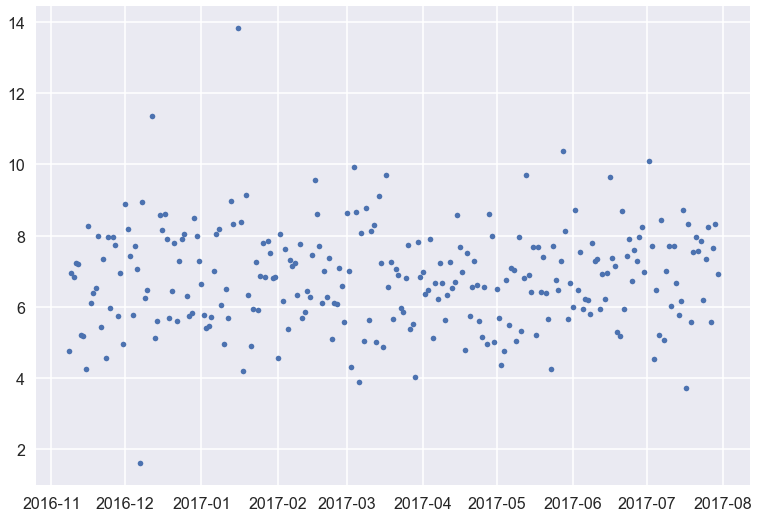

In [32]:
plt.plot(df_sleep['minutesAsleep'].resample('1D').sum()/60., '.')

In [33]:
hours_sleep = df_sleep['minutesAsleep'].resample('1D').sum()/60.

In [34]:
hours_sleep.mean()

6.819783715012723

In [35]:
hours_sleep.std()

1.4052696224078365

In [41]:
os.getcwd()

'/Users/rbussman/Projects/sleep-bit/notebooks'

In [42]:
data_path = os.path.join(os.getcwd(), os.pardir, 'data', 'interim', 'sleep_data.csv')
df_sleep.to_csv(data_path, index_label='shifted_datetime')